In [63]:
import enum
import typing
from dataclasses import dataclass,field
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import cmasher as cmr

In [64]:
converter = {"#":-1,"S":1,".":0}
with open("input21.txt") as f:
    originalgarden = np.array([[converter[c] for c in line.rstrip()] for line in f.readlines()],dtype=int)


In [65]:
def makeonestep(garden):
    N,M = garden.shape
    newgarden=np.minimum(0,garden)
    newpos = np.zeros_like(garden[1:-1,1:-1])
    for dy,dx in [(-1,0),(1,0),(0,-1),(0,1)]:
        newpos+= (garden[1:-1,1:-1]>=0)&(garden[1+dy:N-1+dy,1+dx:M-1+dx]==1)
    newgarden[1:-1,1:-1] += np.minimum(1,newpos)
    return newgarden

# Part 1

In [333]:
originalgarden.shape

(131, 131)

In [66]:
garden =np.pad(originalgarden,1,constant_values=-1)

for k in range(64):
    garden = makeonestep(garden)
(garden==1).sum()

3646

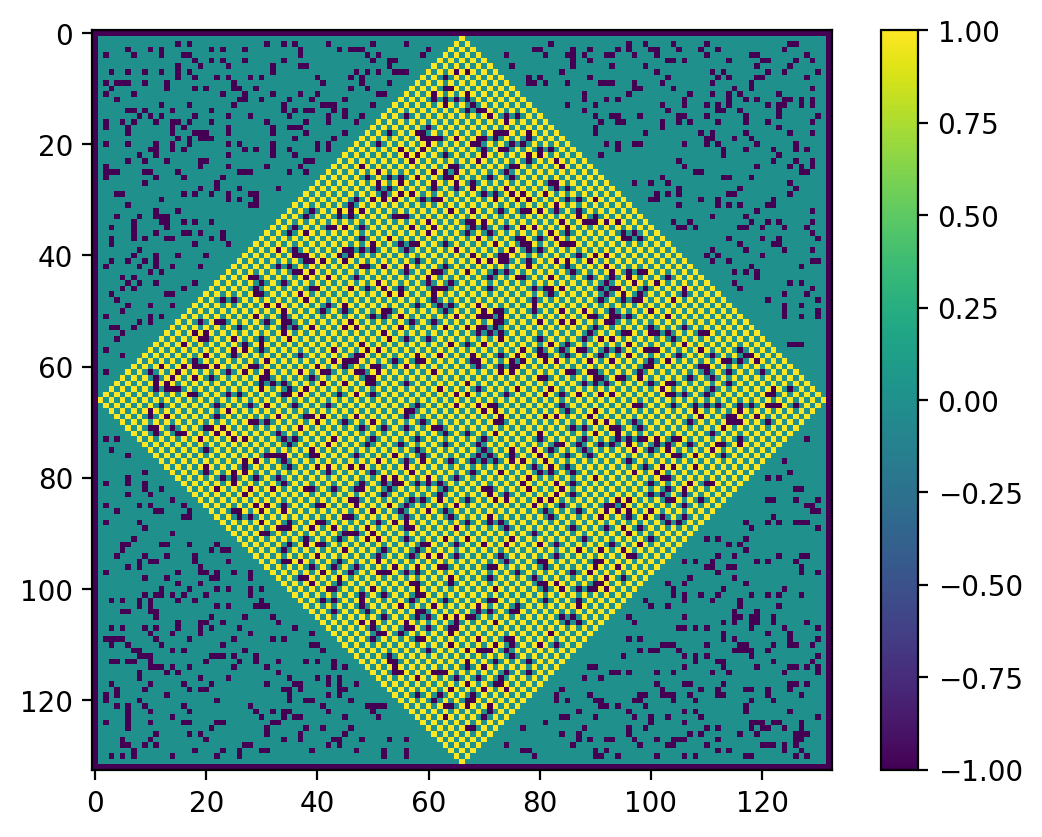

In [67]:
plt.imshow(makeonestep(garden),cmap="viridis")
plt.colorbar()

# Part 2

In [80]:
garden = np.pad(originalgarden,1,constant_values=-1)
for k in range(129):
    garden = makeonestep(garden)
plt.imshow(garden + makeonestep(garden))
unreachable = (garden + makeonestep(garden))[1:-1,1:-1]==0



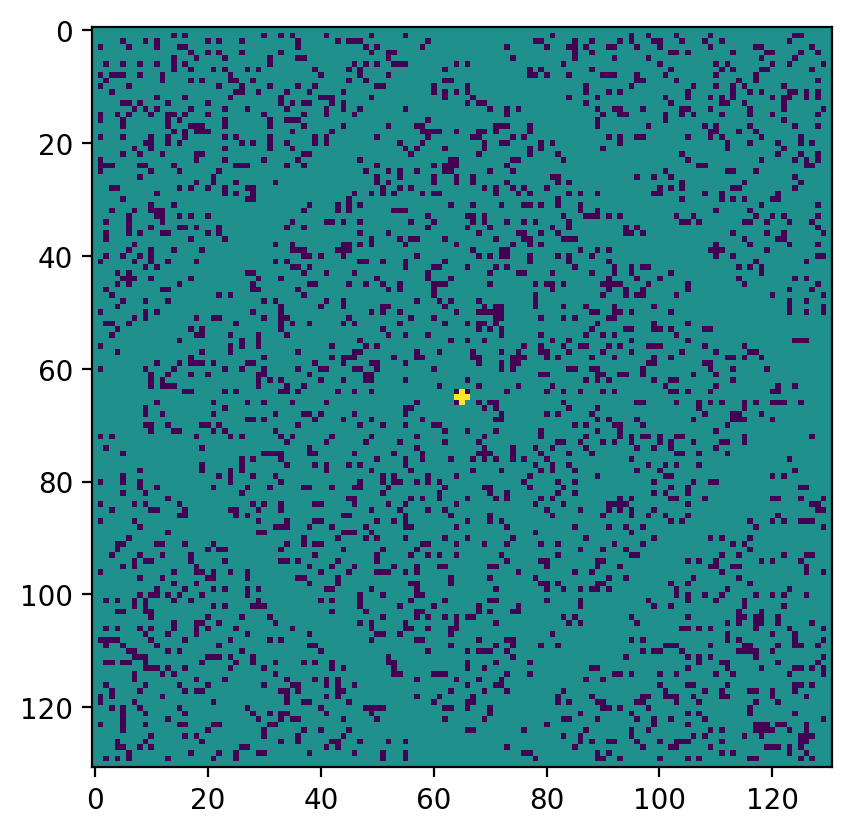

In [182]:
filledgarden = originalgarden-unreachable
zerothandfirstfilledgarden = (makeonestep(filledgarden)==1)+filledgarden #OK because the start is at the middle

plt.imshow(zerothandfirstfilledgarden)
N,M = originalgarden.shape
x0,y0 = np.where(filledgarden==1)
x0 = x0[0]
y0 = y0[0]

In [183]:
Y,X = np.meshgrid(range(N),range(M))

In [ ]:
(X+Y)%2

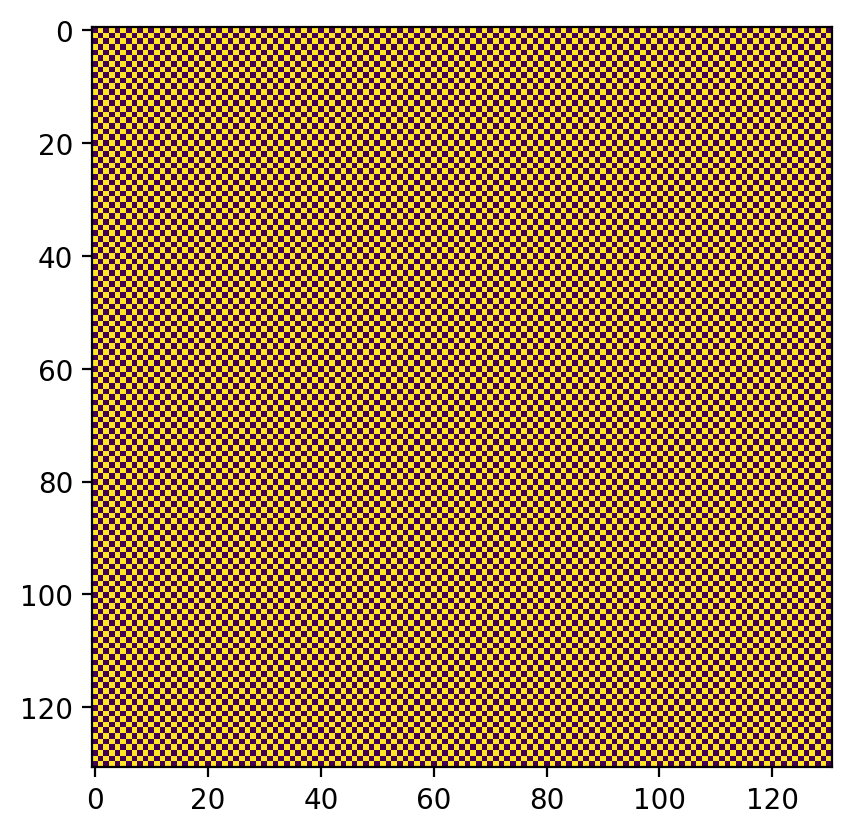

In [210]:
plt.imshow(((X+Y)%2))

In [190]:
(N+1)//2*((M+1)//2) +

4356

In [187]:
N*M

17161

In [211]:
((X+Y)%2).sum()

8580

In [188]:
8580+8581

17161

In [186]:
((X+Y+1)%2).sum()

8581

In [175]:
evengarden = np.zeros_like(zerothandfirstfilledgarden[::2,::2],dtype=int)-10
oddgarden = np.zeros_like(zerothandfirstfilledgarden[1::2,1::2],dtype=int)-10
No,Mo = oddgarden.shape
Ne,Me = evengarden.shape


In [180]:
Ne,Me

(65, 65)

In [170]:
oddfilledgarden[::2,::2].shape

(66, 66)

In [171]:
filledgarden[1::2,1::2].shape

(65, 65)

In [316]:
oddgarden ={}
for y,row in enumerate(zerothandfirstfilledgarden):
    for x,v in enumerate(row):
        if (x+y)%2: #Odd value means that we are on odd steps
            oddgarden[((x+y+N)//2,(x-y+N-1)//2)] = v
            oddgarden[((x+y+N)//2,(x-y-1)//2)] = v
            oddgarden[((x+y)//2,(x-y-1)//2)] = v
            oddgarden[((x+y-N)//2,(x-y-1)//2)] = v
for y,row in enumerate(zerothandfirstfilledgarden):
    for x,v in enumerate(row):
        if (x+y)%2: #Odd value means that we are on odd steps
            oddgarden[((x+y)//2,(x-y+N-1)//2)] = v

In [318]:
newoddgarden = np.zeros((130,130),dtype=int)-10
for (x,y),v in oddgarden.items():
    try:
        newoddgarden[x,y] = v
    except IndexError: pass
    

In [331]:
np.concatenate([np.concatenate([newoddgarden]*2,axis=1)]*2)[130,130]

1

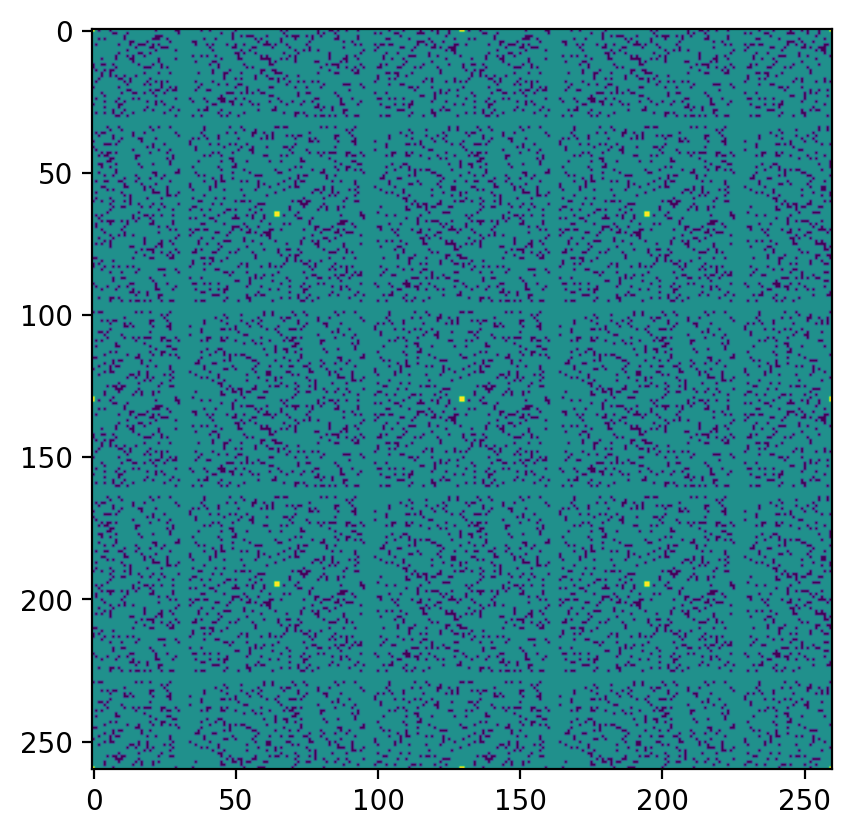

In [323]:
plt.imshow(np.concatenate([np.concatenate([newoddgarden]*2,axis=1)]*2))

In [332]:
Nsteps%131

65

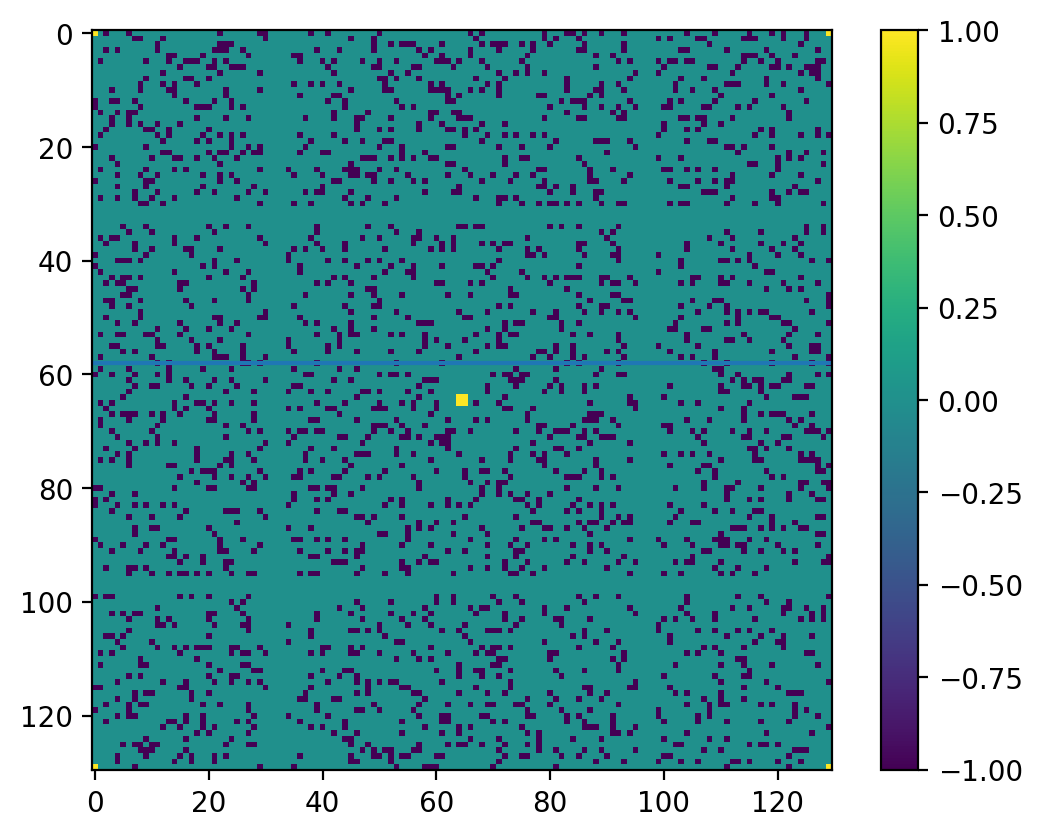

In [302]:
plt.imshow(newoddgarden)
plt.colorbar()
filled = (newoddgarden>=0).sum()
filled
plt.axhline(58)

In [336]:
newoddgarden.shape

(130, 130)

In [337]:
Nsteps = 26501365

In [334]:
G = {i+j*1j:c for i,r in enumerate(open('input21.txt'))
              for j,c in enumerate(r) if c in '.S'}

done = []
todo = {x for x in G if G[x]=='S'}
cmod = lambda x: complex(x.real%131, x.imag%131)

for s in range(3 * 131):
    if s == 64: print(len(todo))
    if s%131 == 65: done.append(len(todo))

    todo = {p+d for d in {1, -1, 1j, -1j}
                for p in todo if cmod(p+d) in G}

f = lambda n,a,b,c: a+n*(b-a+(n-1)*(c-b-b+a)//2)
print(f(26501365 // 131, *done))

3646
606188414811259
